In [23]:
import pandas as pd

df = pd.read_csv("output/data_gov_ua_datastore_audit.csv")
df.columns = ["id", "name", "resources", "rows"]
df.drop_duplicates([df.columns[0]], inplace=True)
df["rows"].describe()

count    3.914500e+04
mean     8.447998e+02
std      3.390243e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.106685e+06
Name: rows, dtype: float64

In [24]:
top3 = df.sort_values("rows", ascending=False).head(3)
top3[["id", "name", "rows"]]

,id,name,rows
168,23490f8d-d11d-409a-9ead-5c9ca2b1d7f4,Державний реєстр оцінювачів та суб'єктів оціно...,5106685
5764,99f3f5bc-7749-4eb5-9714-5ed126faa444,Довідник Калуської районної державної адмініст...,2100221
2658,12ae6bba-ab3b-448c-a8f7-1da7f014e393,"Інформація про систему обліку, види інформації...",1160705


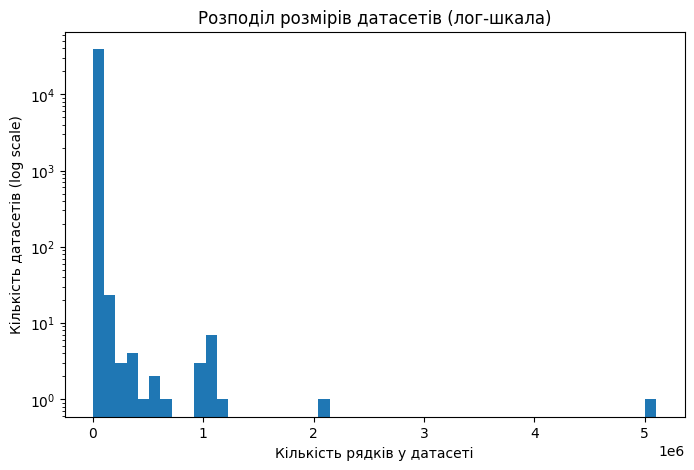

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df["rows"].plot(kind="hist", bins=50, log=True)  # логарифм по осі Y
plt.xlabel("Кількість рядків у датасеті")
plt.ylabel("Кількість датасетів (log scale)")
plt.title("Розподіл розмірів датасетів (лог-шкала)")
plt.show()

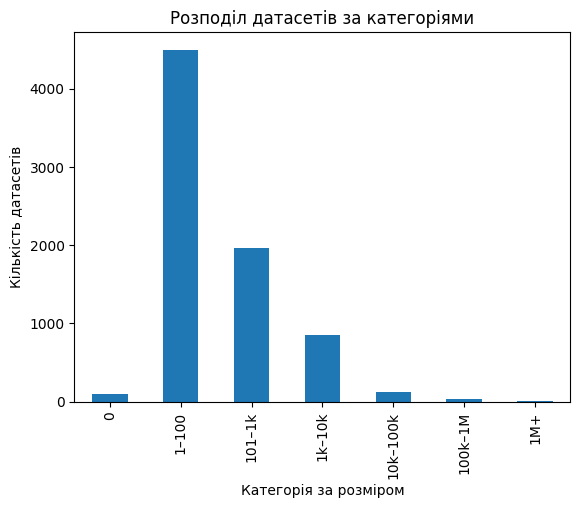

In [28]:
bins = [0, 1, 100, 1000, 10000, 100000, 1000000, float("inf")]
labels = ["0", "1–100", "101–1k", "1k–10k", "10k–100k", "100k–1M", "1M+"]
df["bucket"] = pd.cut(df["rows"], bins=bins, labels=labels)

df["bucket"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Категорія за розміром")
plt.ylabel("Кількість датасетів")
plt.title("Розподіл датасетів за категоріями")
plt.show()